In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# For replicable results
# Refer to the external resource found at here
# https://stackoverflow.com/questions/52375356/is-there-a-way-to-set-random-state-for-all-pandas-function
np.random.seed(42)

In [ ]:
# Import local excel file after initial manual cleaning
# Refer to external resource found at here: https://neptune.ai/blog/google-colab-dealing-with-files
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
df = pd.read_csv('survey_cleaned.csv')
df = df.drop(columns = ['Unnamed: 0'])
df

In [ ]:
df.columns

Index(['IP_ Address', 'Duration', 'Colours_Painting1', 'Colours_Painting2',
       'Colours_Painting3', 'Colours_Painting4', 'Colours_Painting5',
       'Colours_Painting6', 'Colours_Painting7', 'Colours_Painting8',
       'Colours_Painting9', 'Colours_Painting10', 'Brushstrokes_Painting1',
       'Brushstrokes_Painting2', 'Brushstrokes_Painting3',
       'Brushstrokes_Painting4', 'Brushstrokes_Painting5',
       'Brushstrokes_Painting6', 'Brushstrokes_Painting7',
       'Brushstrokes_Painting8', 'Brushstrokes_Painting9',
       'Brushstrokes_Painting10', 'Structures_Painting1',
       'Structures_Painting2', 'Structures_Painting3', 'Structures_Painting4',
       'Structures_Painting5', 'Structures_Painting6', 'Structures_Painting7',
       'Structures_Painting8', 'Structures_Painting9', 'Structures_Painting10',
       'Details_Painting1', 'Details_Painting2', 'Details_Painting3',
       'Details_Painting4', 'Details_Painting5', 'Details_Painting6',
       'Details_Painting7', 'Details

In [ ]:
df['Identification_Performance_Label'].value_counts()

Low              61
Below_Average    44
Above_Average    28
High             17
Name: Identification_Performance_Label, dtype: int64

In [ ]:
df_selected = df.copy()

In [ ]:
# Make the number of participants with each labels the same
# By dropping some participants
# Refer to the external resource found at here
# https://stackoverflow.com/questions/53665458/delete-90-of-random-rows-by-condition-pandas
df_selected = df_selected.drop(df_selected[df_selected['Identification_Performance_Label'] == 'Low'].sample(61-17).index)

In [ ]:
df_selected = df_selected.drop(df_selected[df_selected['Identification_Performance_Label'] == 'Below_Average'].sample(44-17).index)

In [ ]:
df_selected = df_selected.drop(df_selected[df_selected['Identification_Performance_Label'] == 'Above_Average'].sample(28-17).index)

In [ ]:
df_selected['Identification_Performance_Label'].value_counts()

High             17
Below_Average    17
Above_Average    17
Low              17
Name: Identification_Performance_Label, dtype: int64

In [ ]:
X = df_selected[['Condition_Control', 'Condition_Treatment1', 'Condition_Treatment2',
                        'Artistic_Specialty_Self_Rating']]
Y = df_selected[['Identification_Performance_Label']]

In [ ]:
# Run decision tree analysis
# Refer to the external resources found at here:
# https://medium.com/@chyun55555/decision-tree-classifier-with-scikit-learn-from-python-e83f38079fea
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 0, criterion = 'entropy', max_depth = 2)
model.fit(X, Y)
predicted = model.predict(X)

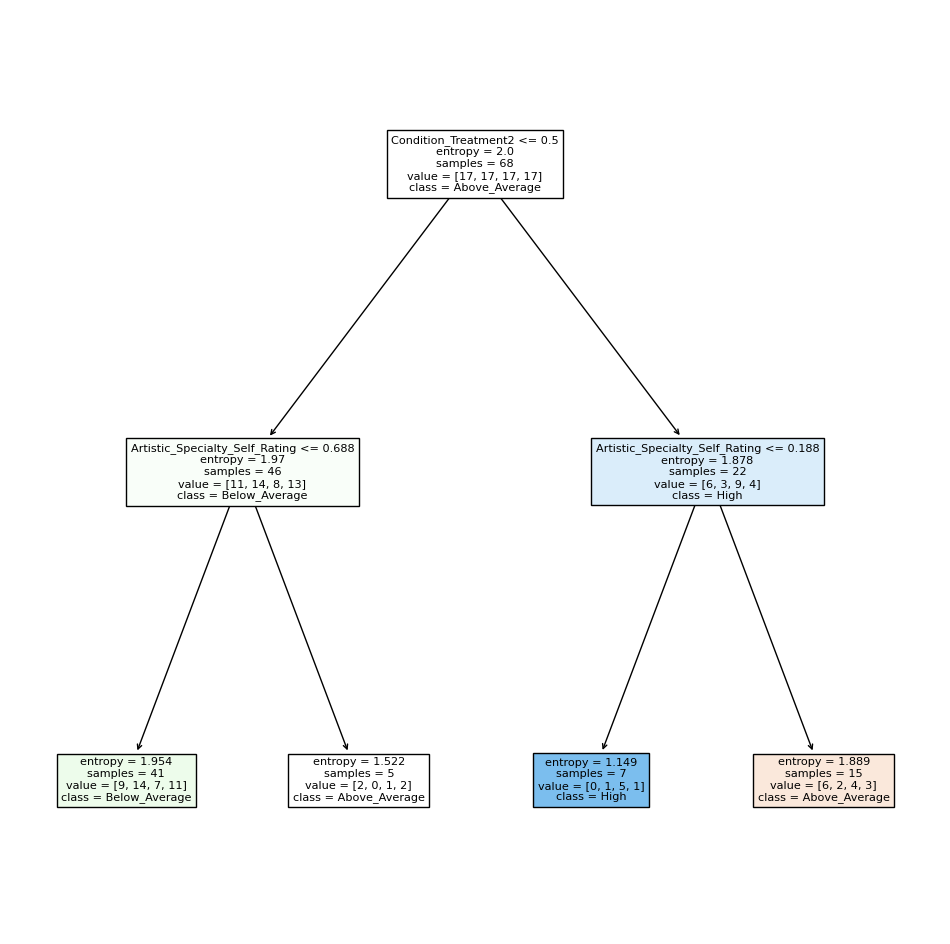

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (12, 12))
tree.plot_tree(model, feature_names = model.feature_names_in_, class_names = model.classes_, filled = True)
plt.show()